In [1]:
import pandas as pd
import numpy as np
import seaborn as sn
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

In [2]:
rec_stats = pd.read_csv("rec_stats/rec_stats.csv")
with open('rec_stats/player_names.txt') as f:
    names = f.readlines()

rec_stats = rec_stats.drop(['Unnamed: 14'], axis = 1)

In [3]:
names

['Tyreek Hill\n',
 'Justin Jefferson\n',
 'Stefon Diggs\n',
 'Cooper Kupp\n',
 'Jaylen Waddle\n',
 'A.J. Brown\n',
 'Travis Kelce\n',
 'Davante Adams\n',
 'Mike Evans\n',
 'Terry McLaurin\n',
 "Ja'Marr Chase\n",
 'Tyler Lockett\n',
 'JuJu Smith-Schuster\n',
 'Christian Kirk\n',
 'Tee Higgins\n',
 'CeeDee Lamb\n',
 'Amari Cooper\n',
 'Michael Pittman\n',
 'Chris Olave\n',
 'Tyler Boyd\n',
 'Dallas Goedert\n',
 'Garrett Wilson\n',
 'DK Metcalf\n',
 'Mike Williams\n',
 'Mark Andrews\n',
 'Marquise Brown\n',
 'Brandon Aiyuk\n',
 'Courtland Sutton\n',
 'T.J. Hockenson\n',
 'Jakobi Meyers\n',
 'Curtis Samuel\n',
 'D.J. Moore\n',
 'Gabe Davis\n',
 'Jerry Jeudy\n',
 'DeVonta Smith\n',
 'Allen Lazard\n',
 'Adam Thielen\n',
 'David Njoku\n',
 'Donovan Peoples-Jones\n',
 'Darnell Mooney\n',
 'Chris Godwin\n',
 'Amon-Ra St. Brown\n',
 'Mack Hollins\n',
 'Alec Pierce\n',
 'Zach Ertz\n',
 'Deebo Samuel\n',
 'Marquez Valdes-Scantling\n',
 'Diontae Johnson\n',
 'Drake London\n',
 'Pat Freiermuth\n',
 

In [4]:
names = list(map(lambda s: s.strip(), names))

In [5]:
stats = rec_stats.assign(player_name = names)

In [6]:
fantasy = pd.read_csv("rec_stats/rec_fantasy.tsv", sep="\t")

In [7]:
fantasy

,rank,player_name,team,points,gp,avg_points
0,1,Tyreek Hill,MIA,130.9,9,14.5
1,2,Stefon Diggs,BUF,127.7,8,16.0
2,3,Cooper Kupp,LAR,126.5,8,15.8
3,4,Jaylen Waddle,MIA,116.9,9,13.0
4,5,Justin Jefferson,MIN,114.9,8,14.4
...,...,...,...,...,...,...
485,131,Brandin Bryant,BUF,0.0,2,0.0
486,131,Kenjon Barner,FA,0.0,1,0.0
487,131,Marlon Mack,SF,0.0,2,0.0
488,131,Jermar Jefferson,DET,0.0,1,0.0


In [8]:
stats

,TEAM,POS,CUSH,SEP,TAY,TAY%,REC,TAR,CTCH%,YDS,TD,YAC/R,xYAC/R,+/-,player_name
0,MIA,WR,6.7,3.7,11.6,41.27,76,100,76.00,1104,3,4.9,4.3,0.6,Tyreek Hill
1,MIN,WR,6.0,3.6,9.5,41.91,59,84,70.24,867,3,6.4,5.5,1.0,Justin Jefferson
2,BUF,WR,5.4,2.9,11.9,38.52,60,83,72.29,857,7,4.7,3.5,1.2,Stefon Diggs
3,LAR,WR,6.5,3.3,7.5,39.43,72,93,77.42,813,6,5.8,4.4,1.4,Cooper Kupp
4,MIA,WR,6.2,3.2,11.2,27.83,47,70,67.14,812,6,6.8,4.7,2.1,Jaylen Waddle
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
114,DAL,WR,6.2,2.4,12.2,14.42,12,23,52.17,135,1,2.4,3.1,-0.7,Michael Gallup
115,NO,WR,6.5,2.2,12.1,11.24,12,24,50.00,128,1,2.6,2.6,0.0,Marquez Callaway
116,CAR,WR,6.4,3.3,9.2,11.40,9,23,39.13,125,0,6.6,5.6,1.0,Shi Smith
117,WAS,TE,5.3,3.1,8.5,7.85,13,23,56.52,106,1,3.1,2.7,0.4,Logan Thomas


In [9]:
df_new = fantasy.iloc[np.where(fantasy.player_name.isin(names))]

In [10]:
df_new

,rank,player_name,team,points,gp,avg_points
0,1,Tyreek Hill,MIA,130.9,9,14.5
1,2,Stefon Diggs,BUF,127.7,8,16.0
2,3,Cooper Kupp,LAR,126.5,8,15.8
3,4,Jaylen Waddle,MIA,116.9,9,13.0
4,5,Justin Jefferson,MIN,114.9,8,14.4
...,...,...,...,...,...,...
254,38,Dalton Schultz,DAL,18.3,6,3.1
255,39,Kylen Granson,IND,17.6,9,2.0
256,40,Logan Thomas,WAS,16.6,5,3.3
258,42,Foster Moreau,LV,15.7,5,3.1


In [11]:
stats

,TEAM,POS,CUSH,SEP,TAY,TAY%,REC,TAR,CTCH%,YDS,TD,YAC/R,xYAC/R,+/-,player_name
0,MIA,WR,6.7,3.7,11.6,41.27,76,100,76.00,1104,3,4.9,4.3,0.6,Tyreek Hill
1,MIN,WR,6.0,3.6,9.5,41.91,59,84,70.24,867,3,6.4,5.5,1.0,Justin Jefferson
2,BUF,WR,5.4,2.9,11.9,38.52,60,83,72.29,857,7,4.7,3.5,1.2,Stefon Diggs
3,LAR,WR,6.5,3.3,7.5,39.43,72,93,77.42,813,6,5.8,4.4,1.4,Cooper Kupp
4,MIA,WR,6.2,3.2,11.2,27.83,47,70,67.14,812,6,6.8,4.7,2.1,Jaylen Waddle
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
114,DAL,WR,6.2,2.4,12.2,14.42,12,23,52.17,135,1,2.4,3.1,-0.7,Michael Gallup
115,NO,WR,6.5,2.2,12.1,11.24,12,24,50.00,128,1,2.6,2.6,0.0,Marquez Callaway
116,CAR,WR,6.4,3.3,9.2,11.40,9,23,39.13,125,0,6.6,5.6,1.0,Shi Smith
117,WAS,TE,5.3,3.1,8.5,7.85,13,23,56.52,106,1,3.1,2.7,0.4,Logan Thomas


In [12]:
all_stats = stats.merge(fantasy)

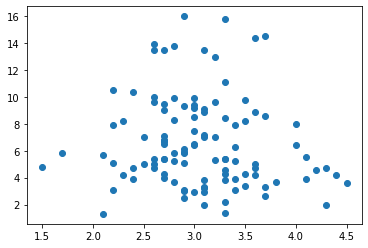

In [13]:
plt.scatter(all_stats['SEP'], all_stats['avg_points'])

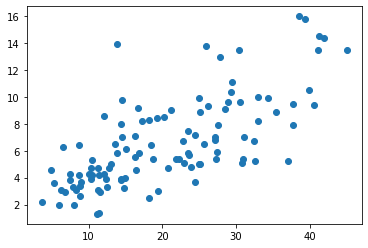

In [14]:
plt.scatter(all_stats['TAY%'], all_stats['avg_points'])

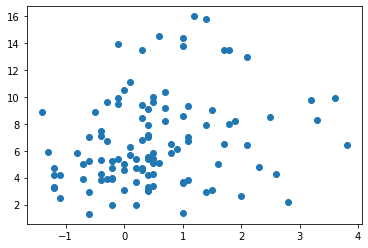

In [15]:
plt.scatter(all_stats['+/-'], all_stats['avg_points'])

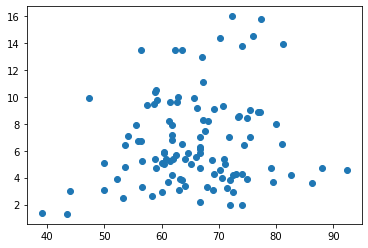

In [16]:
plt.scatter(all_stats['CTCH%'], all_stats['avg_points'])

In [17]:
new_stats = pd.read_csv("rec_stats/new_stats.csv")

In [18]:
new_stats = new_stats.drop(["Unnamed: 14"], axis = 1)

<AxesSubplot:>

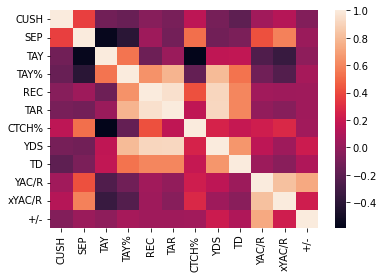

In [19]:
sn.heatmap(new_stats.corr())

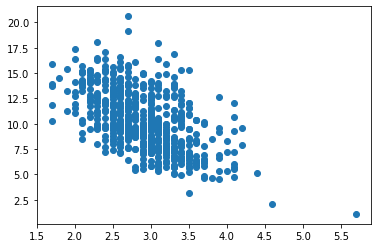

In [20]:
plt.scatter(new_stats['SEP'], new_stats['TAY'])

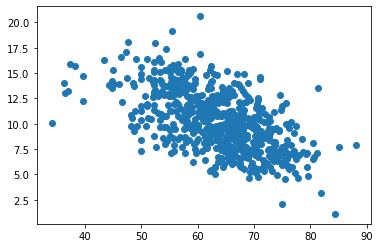

In [21]:
plt.scatter(new_stats['CTCH%'], new_stats['TAY'])

In [22]:
new_stats

,TEAM,POS,CUSH,SEP,TAY,TAY%,REC,TAR,CTCH%,YDS,TD,YAC/R,xYAC/R,+/-
0,NFC,WR,6.5,3.6,8.4,31.32,145,191,75.92,1947,16,6.2,4.8,1.3
1,NFC,WR,5.7,3.0,12.3,45.27,108,167,64.67,1616,10,4.7,4.0,0.8
2,NFC,WR,5.3,2.9,9.1,35.27,123,169,72.78,1553,11,5.4,4.8,0.6
3,AFC,WR,5.0,2.3,12.7,37.38,81,128,63.28,1455,13,8.3,3.9,4.4
4,NFC,WR,6.7,3.3,8.7,26.61,77,121,63.64,1397,6,10.4,5.2,5.2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
628,LAR,TE,6.2,2.6,10.0,10.96,25,45,55.56,295,1,3.6,2.5,1.1
629,NE,TE,5.9,3.1,5.5,6.07,30,44,68.18,286,0,6.0,4.6,1.5
630,SF,WR,6.9,2.7,12.2,12.00,19,48,39.58,260,2,2.2,2.6,-0.4
631,NE,WR,5.7,2.3,12.1,9.73,20,43,46.51,256,2,4.2,2.9,1.3


In [23]:
X_stats = new_stats[['CUSH','SEP','TAY','TAY%', 'CTCH%', '+/-']]

In [24]:
y_stats = new_stats['YDS']

In [25]:
X_train, X_test, y_train, y_test = train_test_split(X_stats, y_stats, random_state = 12)

In [26]:
from sklearn.neighbors import KNeighborsClassifier, KNeighborsRegressor
from sklearn.svm import LinearSVC
knn = KNeighborsClassifier(n_neighbors = 3)

In [27]:
knn.fit(X_train, y_train)
knn.predict(X_test)

array([ 900,  353,  319,  374,  590,  310,  363, 1118,  715,  925,  604,
        504,  286,  831,  374,  334,  417,  776,  210,  306,  423,  851,
        210,  299,  586,  275,  363,  793,  243,  847,  321,  253,  404,
        302,  494,  546,  919,  372,  250,  651,  445,  334,  404,  575,
        854,  449,  448,  613,  494,  445,  667,  456,  318,  567,  272,
       1117,  316,  271,  654,  560,  387, 1052,  494,  306, 1038,  699,
        483,  734,  273,  396,  802,  427,  396,  487,  451, 1053,  396,
        670,  421,  965,  359,  729,  418,  216,  275,  925,  520, 1303,
        485,  590,  653,  377,  634,  802,  275, 1225,  521,  333,  372,
        978,  321,  574,  473, 1028,  840,  583,  418,  334,  677,  677,
        365,  349,  653,  715,  802,  552,  504,  504,  210,  507,  652,
        250,  503,  394,  306,  485,  357, 1093,  367,  771,  832,  503,
        729,  467, 1373,  670,  365,  851,  299,  318, 1038, 1028,  804,
        344,  941,  299,  653,  781,  576,  353,  3

In [28]:
knn.score(X_test, y_test)

0.0

In [29]:
#linear_svm = LinearSVC(max_iter = 999999999)
#linear_svm.fit(X_train, y_train)

In [30]:
#linear_svm.score(X_test, y_test)

In [31]:
reg = KNeighborsRegressor(n_neighbors=4)

In [32]:
reg.fit(X_train, y_train)
reg.predict(X_test)

array([ 970.5 ,  412.  ,  436.25,  600.5 ,  611.  ,  439.75,  456.75,
       1184.  ,  866.5 , 1052.75,  830.5 ,  637.25,  322.25,  913.  ,
        397.25,  428.  ,  449.25,  930.  ,  292.75,  375.25,  494.75,
        913.  ,  298.5 ,  392.  ,  650.5 ,  321.25,  433.5 ,  849.5 ,
        391.  ,  992.75,  466.75,  363.5 ,  446.75,  314.  ,  615.25,
        833.5 , 1273.75,  392.75,  327.5 ,  888.  ,  471.25,  407.75,
        440.25,  659.5 , 1066.25,  470.25,  520.25,  650.5 ,  549.5 ,
        477.25,  698.5 ,  522.5 ,  321.25,  615.75,  343.5 , 1087.75,
        353.25,  398.5 ,  640.5 ,  660.75,  497.25, 1147.5 ,  722.75,
        357.5 , 1198.5 ,  694.  ,  498.25,  940.25,  338.5 ,  506.25,
        892.75,  458.75,  425.75,  573.5 ,  526.25, 1205.5 ,  429.5 ,
        707.  ,  620.75, 1254.75,  448.75, 1068.25,  452.75,  520.5 ,
        318.5 , 1120.75,  538.75, 1332.75,  476.75,  664.75,  710.  ,
        457.  ,  668.  ,  808.5 ,  349.5 , 1299.5 ,  586.75,  364.5 ,
        458.75, 1049

In [33]:
reg.score(X_test, y_test)

0.8219435566926512

In [34]:
lr = LinearRegression().fit(X_train, y_train)

In [35]:
lr.score(X_test, y_test)

0.8160761315182581

In [36]:
params = {'n_neighbors': [1,2,3,4,5,6,7,8,9,10],
          'weights': ['uniform', 'distance'], 
          'algorithm': ['ball_tree', 'kd_tree', 'brute'],
          'leaf_size': [5, 10, 15, 20, 30]}

In [37]:
from sklearn.model_selection import GridSearchCV 
grid_search = GridSearchCV(KNeighborsRegressor(), params, cv=5,return_train_score=True)

In [38]:
grid_search.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=KNeighborsRegressor(),
             param_grid={'algorithm': ['ball_tree', 'kd_tree', 'brute'],
                         'leaf_size': [5, 10, 15, 20, 30],
                         'n_neighbors': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10],
                         'weights': ['uniform', 'distance']},
             return_train_score=True)

In [39]:
grid_search.best_params_

{'algorithm': 'brute', 'leaf_size': 5, 'n_neighbors': 7, 'weights': 'distance'}

In [40]:
grid_search.best_score_

0.7948590665943873

In [41]:
grid_search.score(X_test, y_test)

0.8170312270664006

In [42]:
new_params = {'n_neighbors': [10,11,12,13,14,15,16,17,18,19,20],
          'weights': ['uniform', 'distance'], 
          'algorithm': ['ball_tree', 'kd_tree', 'brute'],
          'leaf_size': [1,2,3,4,5]}

new_grid_search = GridSearchCV(KNeighborsRegressor(), new_params, cv=5,return_train_score=True)
new_grid_search.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=KNeighborsRegressor(),
             param_grid={'algorithm': ['ball_tree', 'kd_tree', 'brute'],
                         'leaf_size': [1, 2, 3, 4, 5],
                         'n_neighbors': [10, 11, 12, 13, 14, 15, 16, 17, 18, 19,
                                         20],
                         'weights': ['uniform', 'distance']},
             return_train_score=True)

In [43]:
new_grid_search.best_params_

{'algorithm': 'brute',
 'leaf_size': 1,
 'n_neighbors': 11,
 'weights': 'distance'}

In [44]:
new_grid_search.best_score_

0.7951781117219541

In [45]:
new_grid_search.score(X_test, y_test)

0.8162483777077787

In [47]:
import warnings
with warnings.catch_warnings(record=True):

    lr_params = {'fit_intercept': [True, False],
             'normalize': [True, False],
             'copy_X': [True, False]}
    lr_grid_search = GridSearchCV(LinearRegression(), lr_params, cv=5, return_train_score=True)
    lr_grid_search.fit(X_train, y_train)
    lr_grid_search.best_params_

In [48]:
lr_grid_search.best_score_

0.8210409564968849

In [49]:
lr_grid_search.score(X_test, y_test)

0.8160761315182582

In [50]:
curr_szn = all_stats[['CUSH','SEP','TAY','TAY%', 'CTCH%', '+/-']]

In [51]:
lr_grid_search.predict(curr_szn)

array([1483.13079528, 1490.54881008, 1391.18155017, 1546.95012961,
       1035.75197971, 1504.42133217, 1069.72610462, 1235.74137592,
       1040.83518244, 1088.58779367, 1099.1270816 , 1204.83312725,
        957.56796131,  910.68074949, 1000.38272486, 1228.91827538,
       1185.30010954, 1049.80864905,  933.42262259,  859.87182319,
        825.42977712, 1180.7443862 ,  993.49390691, 1132.17096942,
        995.36973335, 1021.64608413,  924.09386557,  845.44831494,
        991.37476672,  712.29496423,  688.16395808,  839.13652284,
       1058.84179894,  897.00974848, 1019.68758158,  831.35612558,
        777.1966315 , 1126.99909051,  574.04678386,  678.23685982,
        816.62303486,  723.51032349,  850.50759332,  663.81017433,
        541.9992575 ,  945.82133601,  839.77751464,  633.62079135,
        730.31606174,  818.48454565,  790.89326339,  611.7719618 ,
        600.28761756,  741.69734883,  670.69861615,  739.44334263,
        742.78118107, 1000.0418172 ,  706.97030484,  613.34878

In [52]:
all_stats['proj_yds'] = lr_grid_search.predict(curr_szn)

In [53]:
all_stats

,TEAM,POS,CUSH,SEP,TAY,TAY%,REC,TAR,CTCH%,YDS,...,YAC/R,xYAC/R,+/-,player_name,rank,team,points,gp,avg_points,proj_yds
0,MIA,WR,6.7,3.7,11.6,41.27,76,100,76.00,1104,...,4.9,4.3,0.6,Tyreek Hill,1,MIA,130.9,9,14.5,1483.130795
1,MIN,WR,6.0,3.6,9.5,41.91,59,84,70.24,867,...,6.4,5.5,1.0,Justin Jefferson,5,MIN,114.9,8,14.4,1490.548810
2,BUF,WR,5.4,2.9,11.9,38.52,60,83,72.29,857,...,4.7,3.5,1.2,Stefon Diggs,2,BUF,127.7,8,16.0,1391.181550
3,LAR,WR,6.5,3.3,7.5,39.43,72,93,77.42,813,...,5.8,4.4,1.4,Cooper Kupp,3,LAR,126.5,8,15.8,1546.950130
4,MIA,WR,6.2,3.2,11.2,27.83,47,70,67.14,812,...,6.8,4.7,2.1,Jaylen Waddle,4,MIA,116.9,9,13.0,1035.751980
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
104,DAL,WR,6.2,2.4,12.2,14.42,12,23,52.17,135,...,2.4,3.1,-0.7,Michael Gallup,95,DAL,19.5,5,3.9,277.619899
105,NO,WR,6.5,2.2,12.1,11.24,12,24,50.00,128,...,2.6,2.6,0.0,Marquez Callaway,101,NO,18.8,6,3.1,181.985676
106,CAR,WR,6.4,3.3,9.2,11.40,9,23,39.13,125,...,6.6,5.6,1.0,Shi Smith,122,CAR,12.5,9,1.4,143.441845
107,WAS,TE,5.3,3.1,8.5,7.85,13,23,56.52,106,...,3.1,2.7,0.4,Logan Thomas,40,WAS,16.6,5,3.3,248.706589


In [54]:
highest_yds = all_stats.where(all_stats['proj_yds'] > 900)

highest_yds = highest_yds.dropna

highest_yds().sort_values('proj_yds', ascending = False)

,TEAM,POS,CUSH,SEP,TAY,TAY%,REC,TAR,CTCH%,YDS,...,YAC/R,xYAC/R,+/-,player_name,rank,team,points,gp,avg_points,proj_yds
3,LAR,WR,6.5,3.3,7.5,39.43,72.0,93.0,77.42,813.0,...,5.8,4.4,1.4,Cooper Kupp,3.0,LAR,126.5,8.0,15.8,1546.950130
5,PHI,WR,5.4,2.6,11.1,45.03,43.0,69.0,62.32,718.0,...,6.7,5.0,1.7,A.J. Brown,6.0,PHI,107.8,8.0,13.5,1504.421332
1,MIN,WR,6.0,3.6,9.5,41.91,59.0,84.0,70.24,867.0,...,6.4,5.5,1.0,Justin Jefferson,5.0,MIN,114.9,8.0,14.4,1490.548810
0,MIA,WR,6.7,3.7,11.6,41.27,76.0,100.0,76.00,1104.0,...,4.9,4.3,0.6,Tyreek Hill,1.0,MIA,130.9,9.0,14.5,1483.130795
2,BUF,WR,5.4,2.9,11.9,38.52,60.0,83.0,72.29,857.0,...,4.7,3.5,1.2,Stefon Diggs,2.0,BUF,127.7,8.0,16.0,1391.181550
7,LV,WR,5.6,3.1,11.5,41.22,48.0,85.0,56.47,658.0,...,5.1,4.8,0.3,Davante Adams,7.0,LV,107.7,8.0,13.5,1235.741376
15,DAL,WR,6.6,3.0,10.8,40.65,42.0,73.0,57.53,556.0,...,5.0,4.7,0.3,CeeDee Lamb,14.0,DAL,74.8,8.0,9.4,1228.918275
11,SEA,WR,7.9,3.6,11.7,35.47,51.0,66.0,77.27,598.0,...,2.7,4.1,-1.4,Tyler Lockett,12.0,SEA,79.8,9.0,8.9,1204.833127
16,CLE,WR,5.8,2.2,13.2,39.93,39.0,66.0,59.09,553.0,...,2.9,2.8,0.0,Amari Cooper,10.0,CLE,84.3,8.0,10.5,1185.300110
21,SEA,WR,6.3,2.2,12.1,37.76,42.0,68.0,61.76,510.0,...,3.0,2.5,0.4,DK Metcalf,20.0,SEA,71.0,9.0,7.9,1180.744386
